In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import sys
from pathlib import Path
import os

# import custom functions from src folder
module_path = str(Path.cwd() / "src")

if module_path not in sys.path:
    sys.path.append(module_path)

from robot import Robot

In [24]:
color = ["#e41a1c", "#377eb8"]

In [25]:
SAVE = True
myRobot = Robot(seed=24)
myRobot.vary_a1 = True
myRobot.vary_R2 = False
myRobot.p_red = 0.5
myRobot.k_red = 7
myRobot.k_blue = 3
myRobot.R1_min = 6
myRobot.R2 = 3
traindata = myRobot.simulate(50000, black_box=False)
valdata = myRobot.simulate(5000, black_box=False)
caldata = myRobot.simulate(2000, black_box=False)
testdata = myRobot.simulate(10000, black_box=False)

In [26]:
traindata

,color,x1,x2,a1,a2,r1,r2
0,red,1.002971,13.143999,1.273913,1.847276,13.681311,3
1,red,3.326400,-9.801244,4.746732,1.660628,10.178811,3
2,blue,-6.419414,-6.744136,3.639837,1.260211,7.945030,3
3,blue,3.835441,3.288943,0.281798,2.369622,6.748371,3
4,blue,-0.346090,-6.655437,4.458102,2.678836,9.212955,3
...,...,...,...,...,...,...,...
49995,blue,-4.895731,-0.707192,2.987473,2.637000,7.355255,3
49996,red,1.642129,-9.704471,4.874252,3.122686,12.841726,3
49997,blue,9.310957,-4.406854,5.750364,0.316483,7.407770,3
49998,red,-7.505399,0.447437,3.049198,3.059184,10.504487,3


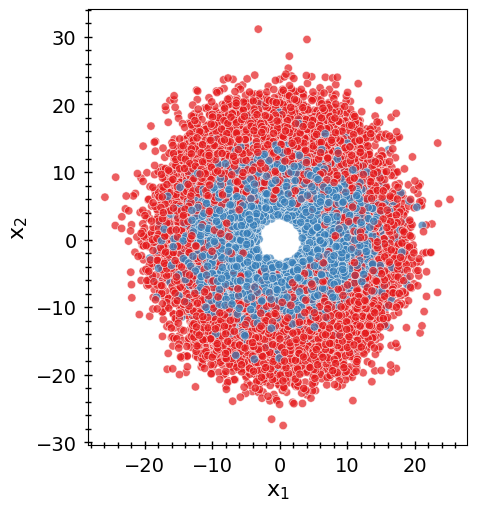

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize= (5, 5), layout="constrained")
sn.scatterplot(traindata, x="x1", y="x2", hue="color", palette=color,
               alpha=0.7, ax = ax, legend=False)
ax.set_xlabel(r"x$_1$", fontsize=16)
ax.set_ylabel(r"x$_2$", fontsize=16)
ax.tick_params(which="both", direction="inout", bottom=True, left=True, labelsize=14, pad=5, length=4, width=1)
ax.tick_params(which="major", length=6)
ax.minorticks_on()
ax.set_aspect('equal', adjustable='box')

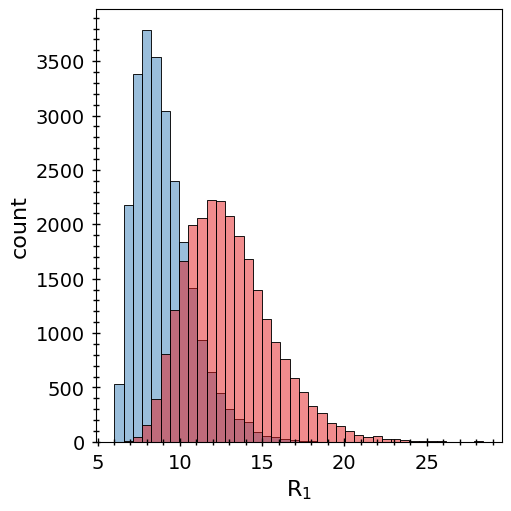

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize= (5, 5), layout="constrained")
sn.histplot(traindata, x="r1", hue="color", bins=40, palette=color, legend=False)
ax.set_xlabel(r"R$_1$", fontsize=16)
ax.set_ylabel(r"count", fontsize=16)
ax.tick_params(which="both", direction="inout", bottom=True, left=True, labelsize=14, pad=5, length=4, width=1)
ax.tick_params(which="major", length=6)
ax.minorticks_on()

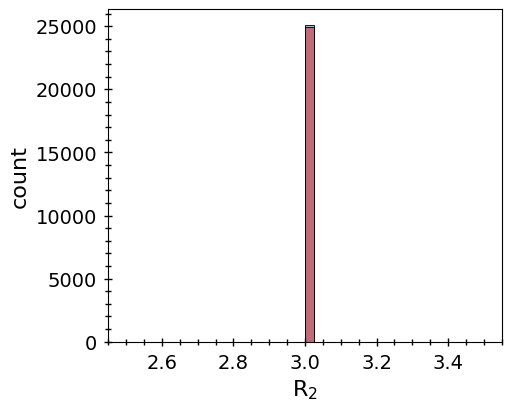

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize= (5, 4), layout="constrained")
sn.histplot(traindata, x="r2", hue="color", bins=40, palette=color, legend=False)
ax.set_xlabel(r"R$_2$", fontsize=16)
ax.set_ylabel(r"count", fontsize=16)
ax.tick_params(which="both", direction="inout", bottom=True, left=True, labelsize=14, pad=5, length=4, width=1)
ax.tick_params(which="major", length=6)
ax.minorticks_on()

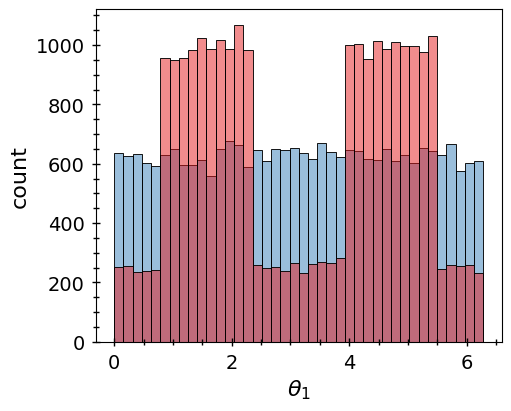

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize= (5, 4), layout="constrained")
sn.histplot(traindata, x="a1", hue="color", bins=40, palette=color, legend=False)
ax.set_xlabel(r"$\theta_1$", fontsize=16)
ax.set_ylabel(r"count", fontsize=16)
ax.tick_params(which="both", direction="inout", bottom=True, left=True, labelsize=14, pad=5, length=4, width=1)
ax.tick_params(which="major", length=6)
ax.minorticks_on()

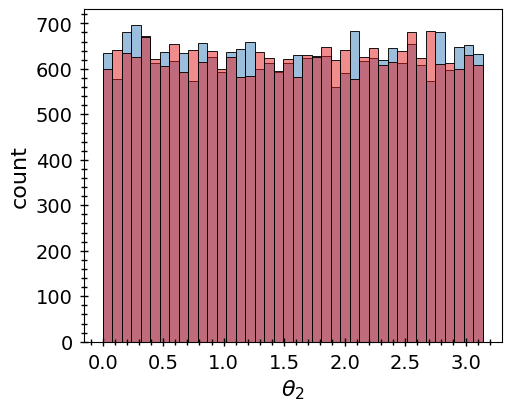

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize= (5, 4), layout="constrained")
sn.histplot(traindata, x="a2", hue="color", bins=40, palette=color, legend=False)
ax.set_xlabel(r"$\theta_2$", fontsize=16)
ax.set_ylabel(r"count", fontsize=16)
ax.tick_params(which="both", direction="inout", bottom=True, left=True, labelsize=14, pad=5, length=4, width=1)
ax.tick_params(which="major", length=6)
ax.minorticks_on()

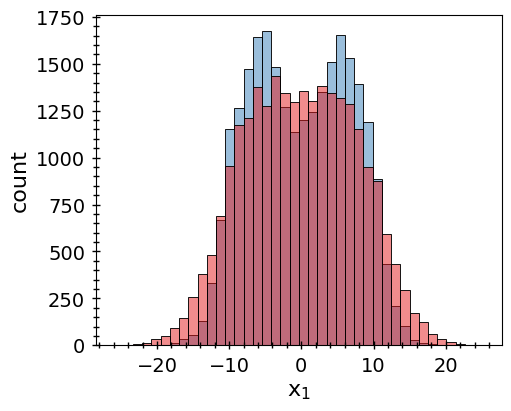

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize= (5, 4), layout="constrained")
sn.histplot(traindata, x="x1", hue="color", bins=40, palette=color, legend=False)
ax.set_xlabel(r"x$_1$", fontsize=16)
ax.set_ylabel(r"count", fontsize=16)
ax.tick_params(which="both", direction="inout", bottom=True, left=True, labelsize=14, pad=5, length=4, width=1)
ax.tick_params(which="major", length=6)
ax.minorticks_on()

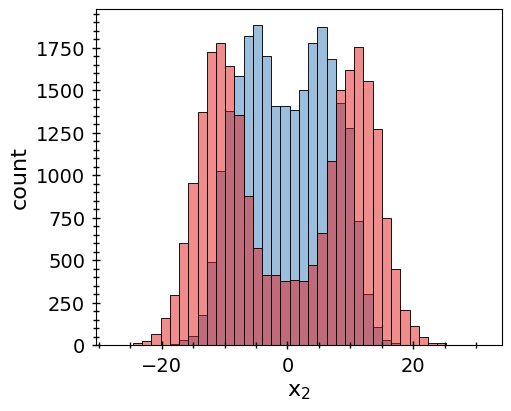

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize= (5, 4), layout="constrained")
sn.histplot(traindata, x="x2", hue="color", bins=40, palette=color, legend=False)
ax.set_xlabel(r"x$_2$", fontsize=16)
ax.set_ylabel(r"count", fontsize=16)
ax.tick_params(which="both", direction="inout", bottom=True, left=True, labelsize=14, pad=5, length=4, width=1)
ax.tick_params(which="major", length=6)
ax.minorticks_on()

In [34]:
params = myRobot.get_parameters()
params

{'seed': 24,
 'R2': 3,
 'vary_R2': False,
 'R1_min': 6,
 'k_red': 7,
 'k_blue': 3,
 'scale': 1,
 'vary_a1': True,
 'p_red': 0.5}

In [35]:
# Convert to polar coordinates
def cartesian_to_polar(df, x_key, y_key, r_key, theta_key):
    df[r_key] = np.sqrt(df[x_key]**2 + df[y_key]**2)
    df[theta_key] = np.arctan(df[y_key]/df[x_key])
    #Get angles in range 0, 2pi
    df_copy = df.copy()
    mask1 = df_copy[x_key] < 0
    df.loc[mask1, theta_key] = df[theta_key] + np.pi
    df_copy = df.copy()
    mask2 = df_copy[theta_key] < 0
    df.loc[mask2, theta_key] = df[theta_key] + 2*np.pi
    return df

def polar_to_cartesian(df, x_key, y_key, r_key, theta_key):
    df[x_key] = df[r_key]*np.cos(df[theta_key])
    df[y_key] = df[r_key]*np.sin(df[theta_key])
    return df

# Give label a numerical value
def word_to_int(df):
    # Red = 0, blue = 1
    df["class"] = 0
    df_copy = df.copy()
    mask = df_copy["color"] == "blue"
    df.loc[mask, "class"] = 1
    return df

In [36]:
traindata = cartesian_to_polar(traindata, "x1", "x2", "r_x", "a_x")
valdata = cartesian_to_polar(valdata, "x1", "x2", "r_x", "a_x")
caldata = cartesian_to_polar(caldata, "x1", "x2", "r_x", "a_x")
testdata = cartesian_to_polar(testdata, "x1", "x2", "r_x", "a_x")
traindata = word_to_int(traindata)
valdata = word_to_int(valdata)
caldata = word_to_int(caldata)
testdata = word_to_int(testdata)

In [37]:
traindata

,color,x1,x2,a1,a2,r1,r2,r_x,a_x,class
0,red,1.002971,13.143999,1.273913,1.847276,13.681311,3,13.182210,1.494638,0
1,red,3.326400,-9.801244,4.746732,1.660628,10.178811,3,10.350329,5.039577,0
2,blue,-6.419414,-6.744136,3.639837,1.260211,7.945030,3,9.310868,3.951654,1
3,blue,3.835441,3.288943,0.281798,2.369622,6.748371,3,5.052500,0.708840,1
4,blue,-0.346090,-6.655437,4.458102,2.678836,9.212955,3,6.664430,4.660435,1
...,...,...,...,...,...,...,...,...,...,...
49995,blue,-4.895731,-0.707192,2.987473,2.637000,7.355255,3,4.946544,3.285051,1
49996,red,1.642129,-9.704471,4.874252,3.122686,12.841726,3,9.842426,4.880015,0
49997,blue,9.310957,-4.406854,5.750364,0.316483,7.407770,3,10.301179,5.841127,1
49998,red,-7.505399,0.447437,3.049198,3.059184,10.504487,3,7.518724,3.082048,0


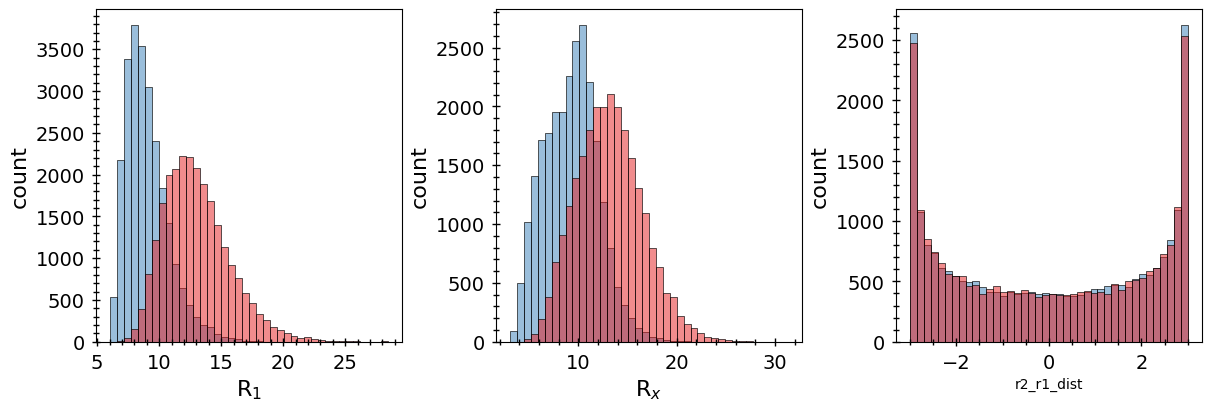

In [38]:
traindata["r2_r1_dist"] = traindata["r2"]*np.cos(traindata["a2"])
fig, axs = plt.subplots(nrows=1, ncols=3, figsize= (12, 4), layout="constrained")
sn.histplot(traindata, x="r1", hue="color", bins=40, palette=color, legend=False, ax=axs[0])
sn.histplot(traindata, x="r_x", hue="color", bins=40, palette=color, legend=False, ax=axs[1])
sn.histplot(traindata, x="r2_r1_dist", hue="color", bins=40, palette=color, legend=False, ax=axs[2])
axs[0].set_xlabel(r"R$_1$", fontsize=16)
axs[1].set_xlabel(r"R$_x$", fontsize=16)
for ax in axs:
    ax.set_ylabel(r"count", fontsize=16)
    ax.tick_params(which="both", direction="inout", bottom=True, left=True, labelsize=14, pad=5, length=4, width=1)
    ax.tick_params(which="major", length=6)
    ax.minorticks_on()

#### Empirical distribution function

/tmp/ipykernel_29327/1003563740.py:5: RuntimeWarning: invalid value encountered in scalar divide
  fraction = [(blue_count[i])/(red_count[i]+blue_count[i]) for i in range(len(red_count))]


Text(0, 0.5, 'P(blue||$\\vec{x}$|)')

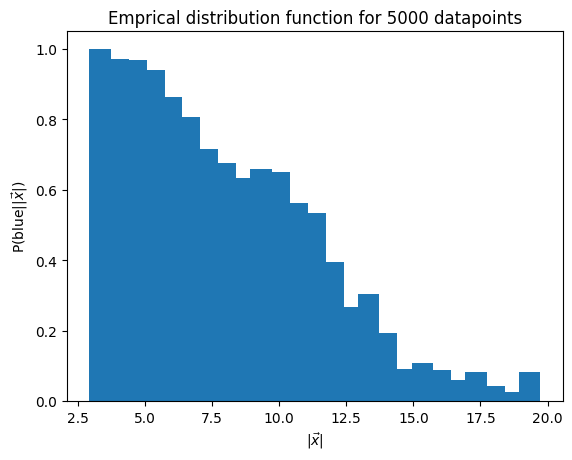

In [39]:
red_rx = valdata[valdata["color"] == "red"]["r_x"].values
blue_rx = valdata[valdata["color"] == "blue"]["r_x"].values
red_count, red_bins = np.histogram(red_rx, bins=30, range=(0, 20))
blue_count, blue_bins = np.histogram(blue_rx, bins=30, range=(0, 20))
fraction = [(blue_count[i])/(red_count[i]+blue_count[i]) for i in range(len(red_count))]
plt.bar(red_bins[0:-1], fraction)
plt.title(f"Emprical distribution function for {len(valdata)} datapoints")
plt.xlabel(r"$|\vec{x}|$")
plt.ylabel(r"P(blue||$\vec{x}$|)")

/tmp/ipykernel_29327/1263858118.py:5: RuntimeWarning: invalid value encountered in scalar divide
  fraction = [(blue_count[i])/(red_count[i]+blue_count[i]) for i in range(len(red_count))]


Text(0, 0.5, 'P(blue||$\\vec{x}$|)')

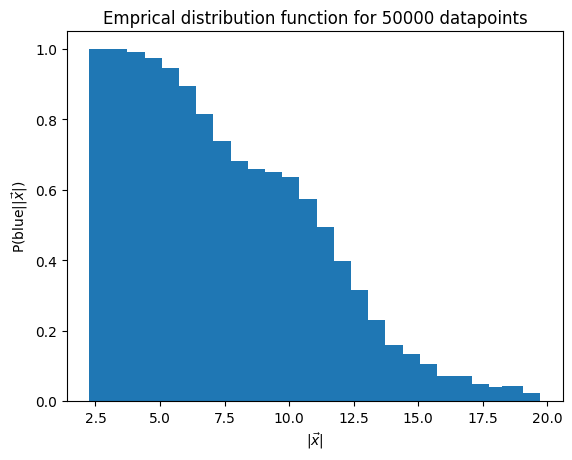

In [40]:
red_rx = traindata[traindata["color"] == "red"]["r_x"].values
blue_rx = traindata[traindata["color"] == "blue"]["r_x"].values
red_count, red_bins = np.histogram(red_rx, bins=30, range=(0, 20))
blue_count, blue_bins = np.histogram(blue_rx, bins=30, range=(0, 20))
fraction = [(blue_count[i])/(red_count[i]+blue_count[i]) for i in range(len(red_count))]
plt.bar(red_bins[0:-1], fraction)
plt.title(f"Emprical distribution function for {len(traindata)} datapoints")
plt.xlabel(r"$|\vec{x}|$")
plt.ylabel(r"P(blue||$\vec{x}$|)")

/tmp/ipykernel_29327/1269650950.py:5: RuntimeWarning: invalid value encountered in scalar divide
  fraction = [(blue_count[i])/(red_count[i]+blue_count[i]) for i in range(len(red_count))]


Text(0, 0.5, 'P(blue||$\\theta_x$|)')

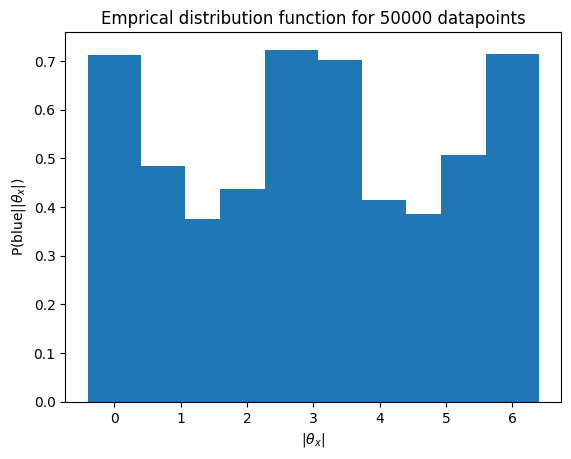

In [41]:
red_rx = traindata[traindata["color"] == "red"]["a_x"].values
blue_rx = traindata[traindata["color"] == "blue"]["a_x"].values
red_count, red_bins = np.histogram(red_rx, bins=30, range=(0, 20))
blue_count, blue_bins = np.histogram(blue_rx, bins=30, range=(0, 20))
fraction = [(blue_count[i])/(red_count[i]+blue_count[i]) for i in range(len(red_count))]
plt.bar(red_bins[0:-1], fraction)
plt.title(f"Emprical distribution function for {len(traindata)} datapoints")
plt.xlabel(r"$|\theta_x|$")
plt.ylabel(r"P(blue||$\theta_x$|)")

In [42]:
# Save data only if it does not already exist
def save_file(df, filename):
    if os.path.isfile(filename):
        print("File already exists. To replace, manually override.")
    else:
        df.to_csv(filename, index=False)

tag = f'r2_{params["R2"]}_kr{params["k_red"]}_kb{params["k_blue"]}_r1min{params["R1_min"]}_s{params["scale"]}_vary_r2_{params["vary_R2"]}_vary_a1_{params["vary_a1"]}_pRed_{params["p_red"]}'
if SAVE:
    trainfile = f'data/train_n_{len(traindata)}_{tag}.csv'
    save_file(traindata, trainfile)
    valfile = f'data/val_n_{len(valdata)}_{tag}.csv'
    save_file(valdata, valfile)
    calfile = f'data/cal_n_{len(caldata)}_{tag}.csv'
    save_file(caldata, calfile)
    testfile = f'data/test_n_{len(testdata)}_{tag}.csv'
    save_file(testdata, testfile)

<Axes: xlabel='x1', ylabel='x2'>

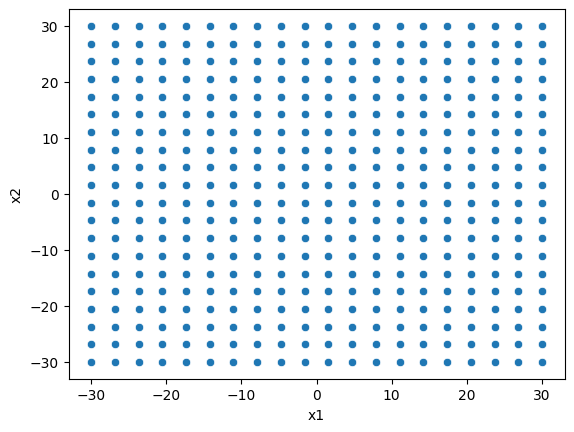

In [43]:
#Make grid for testing against analytical solution
nx = 20
lim_r = 30
x1 = np.linspace(-lim_r, lim_r, nx)
x2 = np.linspace(-lim_r, lim_r, nx)
xx1, xx2 = np.meshgrid(x1, x2)
grid_df = pd.DataFrame(columns = ["x1", "x2"], index = range(len(xx1.flatten())))
grid_df["x1"] = xx1.flatten()
grid_df["x2"] = xx2.flatten()
grid_df = cartesian_to_polar(grid_df, "x1", "x2", "r_x", "a_x")
sn.scatterplot(grid_df, x="x1", y="x2")
#grid_df.to_csv(f'data/x1_x2_grid_{nx}x{nx}_limr_{lim_r}_.csv')

190


<Axes: xlabel='x1', ylabel='x2'>

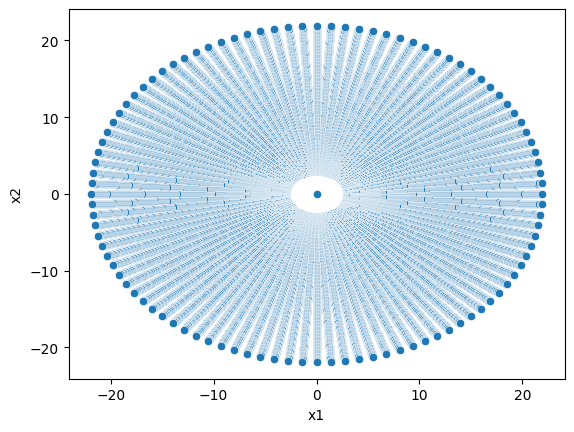

In [44]:
def robot_arm(theta1, theta2, r1, r2):
    ya = r1*np.cos(theta1) + r2*np.cos(theta1 + theta2)
    yb = r1*np.sin(theta1) + r2*np.sin(theta1 + theta2)
    return ya, yb

da = 2*np.pi/100
dr = 0.1
a1 = np.arange(0, 2*np.pi, da)
a2 = 0*a1 + np.pi
#aa1, aa2 = np.meshgrid(a1, a2)
r1_list = np.arange(2*myRobot.R2, 25, dr)
print(len(r1_list))

output = np.array([robot_arm(a1, a2, r, r2=myRobot.R2) for r in r1_list])

circles_df = pd.DataFrame(columns = ["x1", "x2"], index = range(len(output[:,0].flatten()+1)))

circles_df["x1"] = np.array(output[:,0]).flatten()
circles_df["x2"] = np.array(output[:,1]).flatten()
circles_df.loc[-1] = [0,0]

circles_df = cartesian_to_polar(circles_df, "x1", "x2", "r_x", "a_x")

sn.scatterplot(circles_df, x="x1", y="x2")
#circles_df.to_csv(f'data/x1_x2_polar_dr_{dr}_da_2pi_{100}.csv')